In [1]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

In [2]:
# compas naive log preprocessing

trng_acc_logs = []
trng_fair_logs = []
valid_acc_logs = []
valid_fair_logs = []
test_acc_logs = []
test_fair_logs = []

for seed in range(11):
    with open("./log/compas_seed_{}_naive_log.txt".format(seed), "rb") as fp:
        log = pickle.load(fp)
        trng_acc_logs.append(log[0])
        trng_fair_logs.append(log[1])
        valid_acc_logs.append(log[2])
        valid_fair_logs.append(log[3])
        test_acc_logs.append(log[4])
        test_fair_logs.append(log[5])
        
trng_acc_logs = np.array(trng_acc_logs)
trng_fair_logs = np.array(trng_fair_logs)
valid_acc_logs = np.array(valid_acc_logs)
valid_fair_logs = np.array(valid_fair_logs)
test_acc_logs = np.array(test_acc_logs)
test_fair_logs = np.array(test_fair_logs)    

In [3]:
# compas naive acc plotitng

max_test_acc_idx = np.argmax(test_acc_logs, axis=1)

trng_avg_acc_logs = []
valid_avg_acc_logs = []
test_avg_acc_logs = []

for row, col in enumerate(max_test_acc_idx):
    trng_avg_acc_logs.append(trng_acc_logs[row, col])
    valid_avg_acc_logs.append(valid_acc_logs[row, col])
    test_avg_acc_logs.append(test_acc_logs[row, col])

naive_trng_acc = np.mean(trng_avg_acc_logs)
naive_valid_acc = np.mean(valid_avg_acc_logs)
naive_test_acc = np.mean(test_avg_acc_logs)



print("naive_trng_acc:{}, naive_valid_acc:{}, naive_test_acc:{}".format(naive_trng_acc,
                                                                        naive_valid_acc, 
                                                                        naive_test_acc))

naive_trng_acc:0.7071782112980718, naive_valid_acc:0.6541401860550796, naive_test_acc:0.6599381169883601


In [4]:
# compas naive fair plotitng

trng_avg_fair_logs = []
valid_avg_fair_logs = []
test_avg_fair_logs = []

for row, col in enumerate(max_test_acc_idx):
    trng_avg_fair_logs.append(trng_fair_logs[row, col])
    valid_avg_fair_logs.append(valid_fair_logs[row, col])
    test_avg_fair_logs.append(test_fair_logs[row, col])

naive_trng_fair = np.mean(trng_avg_fair_logs)
naive_valid_fair = np.mean(valid_avg_fair_logs)
naive_test_fair = np.mean(test_avg_fair_logs)

print("naive_trng_fair:{}, naive_valid_fair:{}, naive_test_fair:{}".format(np.mean(naive_trng_fair),
                                                                        np.mean(naive_valid_fair), 
                                                                        np.mean(naive_test_fair)))

naive_trng_fair:0.12280705383604394, naive_valid_fair:0.16525976390516478, naive_test_fair:0.12404237422992112


In [5]:
# compas leave-k-out preprocessing

trng_avg_acc_logs_by_k = []
trng_avg_fair_logs_by_k = []
valid_avg_acc_logs_by_k = []
valid_avg_fair_logs_by_k = []
test_avg_acc_logs_by_k = []
test_avg_fair_logs_by_k = []

for k in range(1, 21, 1):

    trng_acc_logs = []
    trng_fair_logs = []
    valid_acc_logs = []
    valid_fair_logs = []
    test_acc_logs = []
    test_fair_logs = []

    for seed in range(11):
        with open("./log/compas_seed_{}_k_{}.0_acc_fair_log.txt".format(seed, k), "rb") as fp:
            log = pickle.load(fp)
            
            trng_acc_logs.append(log[0])
            trng_fair_logs.append(log[1])
            valid_acc_logs.append(log[2])
            valid_fair_logs.append(log[3])
            test_acc_logs.append(log[4])
            test_fair_logs.append(log[5]) 
                
    trng_acc_logs = np.array(trng_acc_logs)
    trng_fair_logs = np.array(trng_fair_logs)
    valid_acc_logs = np.array(valid_acc_logs)
    valid_fair_logs = np.array(valid_fair_logs)
    test_acc_logs = np.array(test_acc_logs)
    test_fair_logs = np.array(test_fair_logs)
    
    trng_avg_acc_logs_by_k.append(np.mean(trng_acc_logs, axis=0))
    trng_avg_fair_logs_by_k.append(np.mean(trng_fair_logs, axis=0))
    valid_avg_acc_logs_by_k.append(np.mean(valid_acc_logs, axis=0))
    valid_avg_fair_logs_by_k.append(np.mean(valid_fair_logs, axis=0))
    test_avg_acc_logs_by_k.append(np.mean(test_acc_logs, axis=0))
    test_avg_fair_logs_by_k.append(np.mean(test_fair_logs, axis=0))

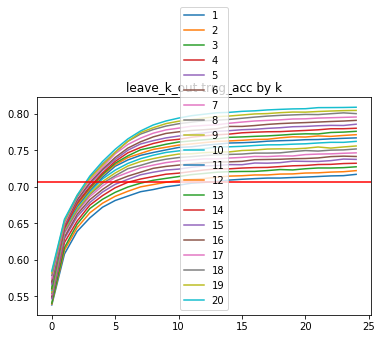

In [6]:
for k in range(20):
    plt.plot(trng_avg_acc_logs_by_k[k], label="{}".format(k + 1))

plt.axhline(y = naive_trng_acc, color='r', linestyle='-')
plt.title("leave_k_out trng_acc by k")
plt.legend()
plt.show()

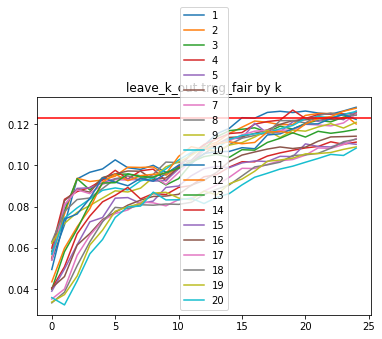

In [7]:
for k in range(20):
    plt.plot(trng_avg_fair_logs_by_k[k], label="{}".format(k + 1))
plt.axhline(y = naive_trng_fair, color='r', linestyle='-')
plt.title("leave_k_out trng_fair by k")
plt.legend()
plt.show()

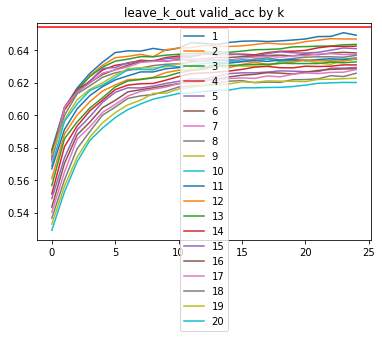

In [8]:
for k in range(20):
    plt.plot(valid_avg_acc_logs_by_k[k], label="{}".format(k + 1))
plt.axhline(y = naive_valid_acc, color='r', linestyle='-')
plt.title("leave_k_out valid_acc by k")
plt.legend()
plt.show()

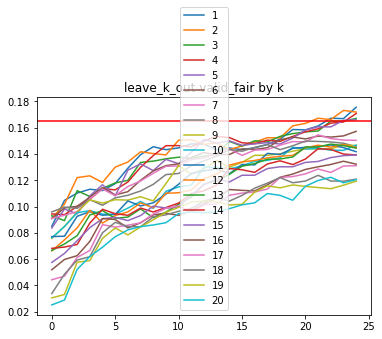

In [9]:
for k in range(20):
    plt.plot(valid_avg_fair_logs_by_k[k], label="{}".format(k + 1))
plt.axhline(y = naive_valid_fair, color='r', linestyle='-')
plt.title("leave_k_out valid_fair by k")
plt.legend()
plt.show()

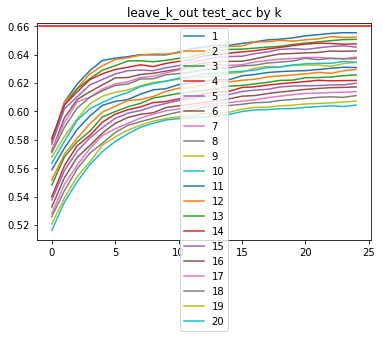

In [10]:
for k in range(20):
    plt.plot(test_avg_acc_logs_by_k[k], label="{}".format(k + 1))
plt.axhline(y = naive_test_acc, color='r', linestyle='-')
plt.title("leave_k_out test_acc by k")
plt.legend()
plt.show()

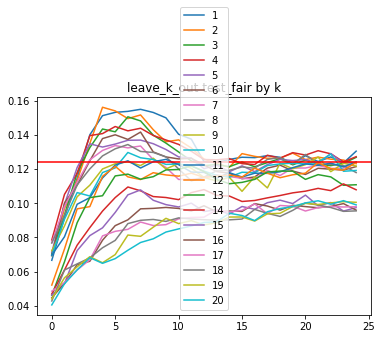

In [11]:
for k in range(20):
    plt.plot(test_avg_fair_logs_by_k[k], label="{}".format(k + 1))
plt.axhline(y = naive_test_fair, color='r', linestyle='-')
plt.title("leave_k_out test_fair by k")
plt.legend()
plt.show()

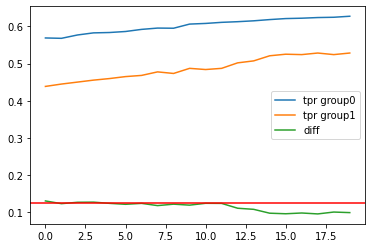

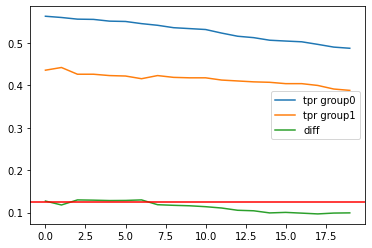

In [12]:
# test tpr plotting top k out case

tpr_0 = []
tpr_1 = []

for k in range(20):
    tpr_0_temp = 0
    tpr_1_temp = 0
    for seed in range(11):
        with open("./log/compas_seed_{}_k_{}.0_confusion_matrix.txt".format(seed, k+1), "rb") as fp:
            confu_mat = pickle.load(fp)
        
        tn_0, fp_0, fn_0, tp_0 = confu_mat[24][2][0].ravel()
        tn_1, fp_1, fn_1, tp_1 = confu_mat[24][2][1].ravel()
        
        tpr_0_temp += tp_0 / (fn_0 + tp_0)
        tpr_1_temp += tp_1 / (fn_1 + tp_1)
        
    tpr_0.append(tpr_0_temp / 11.0)
    tpr_1.append(tpr_1_temp / 11.0)

tpr_0 = np.array(tpr_0)
tpr_1 = np.array(tpr_1)

plt.plot(tpr_0, label="tpr group0")
plt.plot(tpr_1, label="tpr group1")
plt.plot(tpr_0 - tpr_1, label="diff")

plt.axhline(naive_test_fair, color='r')
plt.legend()

plt.show()

# test group wise tpr plotting bottom k out case
tpr_0 = []
tpr_1 = []

for k in range(20):
    tpr_0_temp = 0
    tpr_1_temp = 0
    for seed in range(11):
        with open("./log/compas_seed_{}_bottom_k_{}.0_confusion_matrix.txt".format(seed, k+1), "rb") as fp:
            confu_mat = pickle.load(fp)
        
        tn_0, fp_0, fn_0, tp_0 = confu_mat[24][2][0].ravel()
        tn_1, fp_1, fn_1, tp_1 = confu_mat[24][2][1].ravel()
        
        tpr_0_temp += tp_0 / (fn_0 + tp_0)
        tpr_1_temp += tp_1 / (fn_1 + tp_1)
        
    tpr_0.append(tpr_0_temp / 11.0)
    tpr_1.append(tpr_1_temp / 11.0)

tpr_0 = np.array(tpr_0)
tpr_1 = np.array(tpr_1)

plt.plot(tpr_0, label="tpr group0")
plt.plot(tpr_1, label="tpr group1")
plt.plot(tpr_0 - tpr_1, label="diff")
plt.axhline(naive_test_fair, color='r')
plt.legend()

plt.show()
        
        
        
        

In [13]:
# compas leave-bottom-k-out preprocessing

trng_avg_acc_logs_by_k = []
trng_avg_fair_logs_by_k = []
valid_avg_acc_logs_by_k = []
valid_avg_fair_logs_by_k = []
test_avg_acc_logs_by_k = []
test_avg_fair_logs_by_k = []

for k in range(1, 21, 1):

    trng_acc_logs = []
    trng_fair_logs = []
    valid_acc_logs = []
    valid_fair_logs = []
    test_acc_logs = []
    test_fair_logs = []

    for seed in range(11):
        with open("./log/compas_seed_{}_bottom_k_{}.0_acc_fair_log.txt".format(seed, k), "rb") as fp:
            log = pickle.load(fp)
            
            trng_acc_logs.append(log[0])
            trng_fair_logs.append(log[1])
            valid_acc_logs.append(log[2])
            valid_fair_logs.append(log[3])
            test_acc_logs.append(log[4])
            test_fair_logs.append(log[5]) 
                
    trng_acc_logs = np.array(trng_acc_logs)
    trng_fair_logs = np.array(trng_fair_logs)
    valid_acc_logs = np.array(valid_acc_logs)
    valid_fair_logs = np.array(valid_fair_logs)
    test_acc_logs = np.array(test_acc_logs)
    test_fair_logs = np.array(test_fair_logs)
    
    trng_avg_acc_logs_by_k.append(np.mean(trng_acc_logs, axis=0))
    trng_avg_fair_logs_by_k.append(np.mean(trng_fair_logs, axis=0))
    valid_avg_acc_logs_by_k.append(np.mean(valid_acc_logs, axis=0))
    valid_avg_fair_logs_by_k.append(np.mean(valid_fair_logs, axis=0))
    test_avg_acc_logs_by_k.append(np.mean(test_acc_logs, axis=0))
    test_avg_fair_logs_by_k.append(np.mean(test_fair_logs, axis=0))

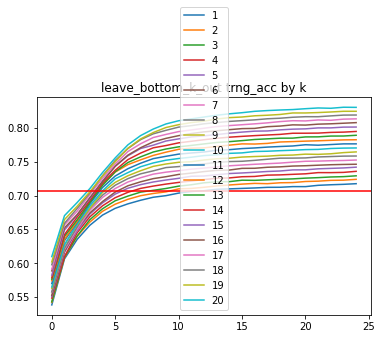

In [14]:
for k in range(20):
    plt.plot(trng_avg_acc_logs_by_k[k], label="{}".format(k + 1))
plt.axhline(y = naive_trng_acc, color='r', linestyle='-')
plt.title("leave_bottom_k_out trng_acc by k")
plt.legend()
plt.show()

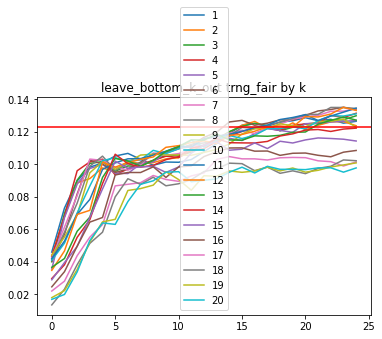

In [15]:
for k in range(20):
    plt.plot(trng_avg_fair_logs_by_k[k], label="{}".format(k + 1))
plt.axhline(y = naive_trng_fair, color='r', linestyle='-')
plt.title("leave_bottom_k_out trng_fair by k")
plt.legend()
plt.show()

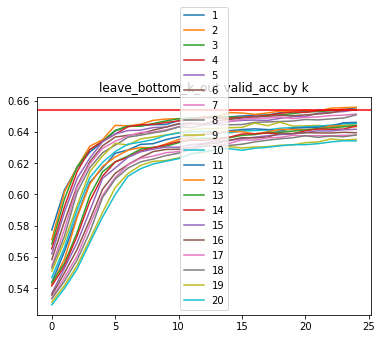

In [16]:
for k in range(20):
    plt.plot(valid_avg_acc_logs_by_k[k], label="{}".format(k + 1))
plt.axhline(y = naive_valid_acc, color='r', linestyle='-')
plt.title("leave_bottom_k_out valid_acc by k")
plt.legend()
plt.show()

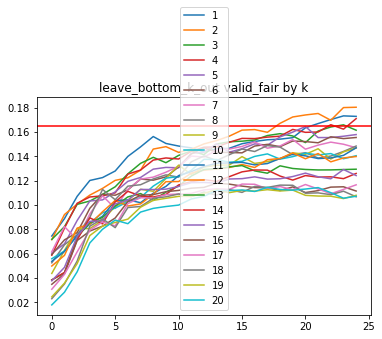

In [17]:
for k in range(20):
    plt.plot(valid_avg_fair_logs_by_k[k], label="{}".format(k + 1))
plt.axhline(y = naive_valid_fair, color='r', linestyle='-')
plt.title("leave_bottom_k_out valid_fair by k")
plt.legend()
plt.show()

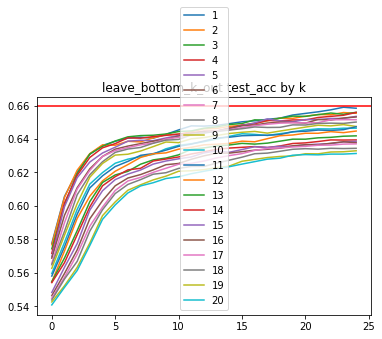

In [18]:
for k in range(20):
    plt.plot(test_avg_acc_logs_by_k[k], label="{}".format(k + 1))
plt.axhline(y = naive_test_acc, color='r', linestyle='-')
plt.title("leave_bottom_k_out test_acc by k")
plt.legend()
plt.show()

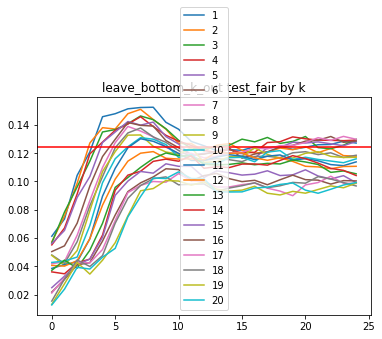

In [19]:
for k in range(20):
    plt.plot(test_avg_fair_logs_by_k[k], label="{}".format(k + 1))
plt.axhline(y = naive_test_fair, color='r', linestyle='-')
plt.title("leave_bottom_k_out test_fair by k")
plt.legend()
plt.show()

In [20]:
# compas leave-k-out preprocessing

trng_avg_acc_logs_by_k = []
trng_avg_fair_logs_by_k = []
valid_avg_acc_logs_by_k = []
valid_avg_fair_logs_by_k = []
test_avg_acc_logs_by_k = []
test_avg_fair_logs_by_k = []

for k in np.arange(0.1, 1, 0.1):

    trng_acc_logs = []
    trng_fair_logs = []
    valid_acc_logs = []
    valid_fair_logs = []
    test_acc_logs = []
    test_fair_logs = []

    for seed in range(11):
        with open("./log/compas_seed_{}_k_{:.1f}_acc_fair_log.txt".format(seed, k), "rb") as fp:
            log = pickle.load(fp)
            
            trng_acc_logs.append(log[0])
            trng_fair_logs.append(log[1])
            valid_acc_logs.append(log[2])
            valid_fair_logs.append(log[3])
            test_acc_logs.append(log[4])
            test_fair_logs.append(log[5]) 
                
    trng_acc_logs = np.array(trng_acc_logs)
    trng_fair_logs = np.array(trng_fair_logs)
    valid_acc_logs = np.array(valid_acc_logs)
    valid_fair_logs = np.array(valid_fair_logs)
    test_acc_logs = np.array(test_acc_logs)
    test_fair_logs = np.array(test_fair_logs)
    
    trng_avg_acc_logs_by_k.append(np.mean(trng_acc_logs, axis=0))
    trng_avg_fair_logs_by_k.append(np.mean(trng_fair_logs, axis=0))
    valid_avg_acc_logs_by_k.append(np.mean(valid_acc_logs, axis=0))
    valid_avg_fair_logs_by_k.append(np.mean(valid_fair_logs, axis=0))
    test_avg_acc_logs_by_k.append(np.mean(test_acc_logs, axis=0))
    test_avg_fair_logs_by_k.append(np.mean(test_fair_logs, axis=0))

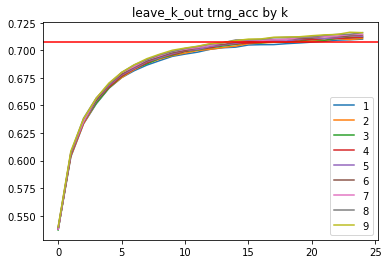

In [21]:
for k in range(9):
    plt.plot(trng_avg_acc_logs_by_k[k], label="{}".format(k + 1))

plt.axhline(y = naive_trng_acc, color='r', linestyle='-')
plt.title("leave_k_out trng_acc by k")
plt.legend()
plt.show()

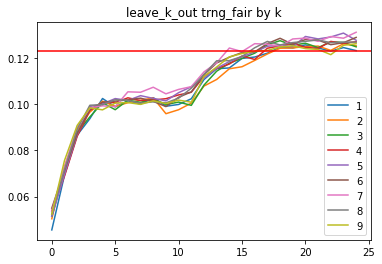

In [22]:
for k in range(9):
    plt.plot(trng_avg_fair_logs_by_k[k], label="{}".format(k + 1))
plt.axhline(y = naive_trng_fair, color='r', linestyle='-')
plt.title("leave_k_out trng_fair by k")
plt.legend()
plt.show()

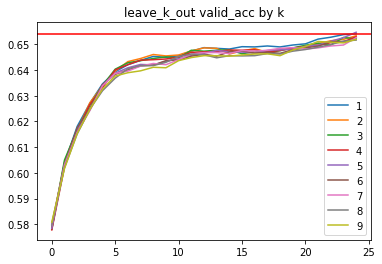

In [23]:
for k in range(9):
    plt.plot(valid_avg_acc_logs_by_k[k], label="{}".format(k + 1))
plt.axhline(y = naive_valid_acc, color='r', linestyle='-')
plt.title("leave_k_out valid_acc by k")
plt.legend()
plt.show()

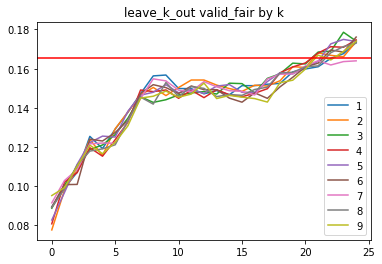

In [24]:
for k in range(9):
    plt.plot(valid_avg_fair_logs_by_k[k], label="{}".format(k + 1))
plt.axhline(y = naive_valid_fair, color='r', linestyle='-')
plt.title("leave_k_out valid_fair by k")
plt.legend()
plt.show()